In [1]:
from pathlib import Path
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from IPython.display import Image
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [4]:
data = Path('resources/Housing2.csv')
df = pd.read_csv(data)
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [5]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64


In [6]:
# Encoding categorical variables using pd.get_dummies
df_encoded = pd.get_dummies(df, drop_first=True)


In [7]:
# Assuming df_encoded is your preprocessed DataFrame ready for scaling
scaler = StandardScaler()

# Selecting only numerical features for scaling
numerical_features = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Fit the scaler to the training data and transform
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])


In [9]:
# Define features and target variable
X = df_encoded.drop('Price', axis=1)  # Features
y = df_encoded['Price']                # Target variable

In [11]:
#(stratify=y) stratify parameter is intended for use in classification tasks where the target variable consist of categories or 
#classes to ensure that each split of the data has the same proportion of categorical values as the original dataset. 
#Cannot use Stratefy here. 

# Split the dataset into training and testing sets
# 80% of the data will be used for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape

(40000, 6)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2= r2_score(y_test, predictions)


print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Model Performance:
Mean Absolute Error (MAE): 0.5178566489840383
Mean Squared Error (MSE): 0.4202267139221315
R-squared (R2): 0.5755628630306234


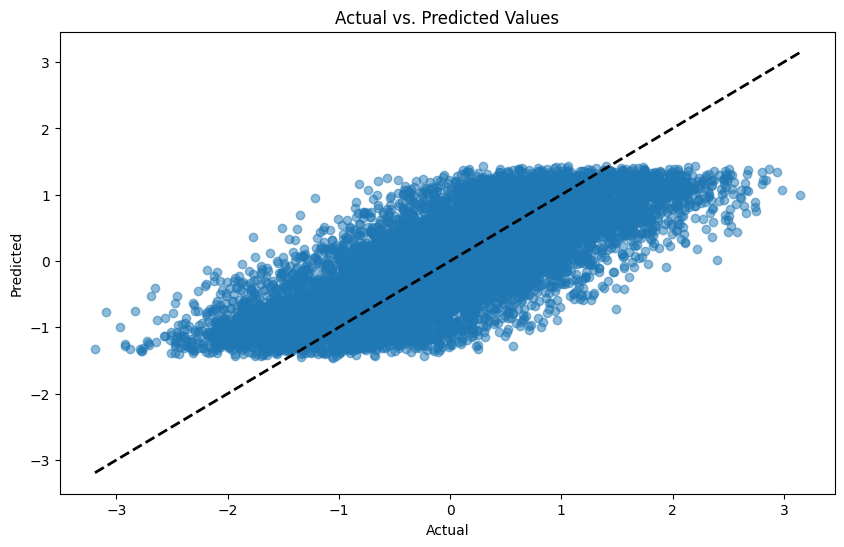

In [13]:
# Actual vs. Predicted values plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()


In [64]:
new_input_features = pd.DataFrame({
    'area': [7420],
    'bedrooms': [4],
    'bathrooms': [2],
    'stories': [3],
    'parking': [2],
    'mainroad_yes': [1],
    'guestroom_yes': [0],
    'basement_yes': [0],
    'hotwaterheating_yes': [0],
    'airconditioning_yes': [1],
    'prefarea_yes': [1],
    'furnishingstatus_semi-furnished': [1],
    'furnishingstatus_unfurnished': [0]
})
predicted_price = model.predict(new_input_features)

print(f"Predicted Housing Price: {predicted_price[0]}")

Predicted Housing Price: 2033.3980719398471
